In [63]:
import os 
import zipfile
import pandas as pd
import seaborn as sns
import numpy as np
os.chdir("/home/linux/Downloads")
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier

In [64]:
with zipfile.ZipFile("archive(3).zip") as z:
    with z.open("ibm.csv") as f:
        df=pd.read_csv(f)
df.head(50)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<AxesSubplot:>

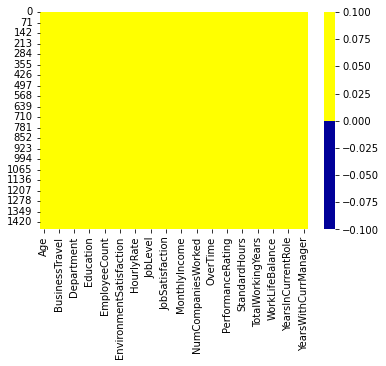

In [66]:
cols=df.columns[:35]
colours = ['#000099', '#ffff00']# specfiy color yellow missing,blue is not missing
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [67]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Age - 0%
Attrition - 0%
BusinessTravel - 0%
DailyRate - 0%
Department - 0%
DistanceFromHome - 0%
Education - 0%
EducationField - 0%
EmployeeCount - 0%
EmployeeNumber - 0%
EnvironmentSatisfaction - 0%
Gender - 0%
HourlyRate - 0%
JobInvolvement - 0%
JobLevel - 0%
JobRole - 0%
JobSatisfaction - 0%
MaritalStatus - 0%
MonthlyIncome - 0%
MonthlyRate - 0%
NumCompaniesWorked - 0%
Over18 - 0%
OverTime - 0%
PercentSalaryHike - 0%
PerformanceRating - 0%
RelationshipSatisfaction - 0%
StandardHours - 0%
StockOptionLevel - 0%
TotalWorkingYears - 0%
TrainingTimesLastYear - 0%
WorkLifeBalance - 0%
YearsAtCompany - 0%
YearsInCurrentRole - 0%
YearsSinceLastPromotion - 0%
YearsWithCurrManager - 0%


In [68]:
df.dropna()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [69]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [70]:
#sns.pairplot(df)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[["Age","JobLevel","WorkLifeBalance","YearsWithCurrManager"]],df[["PercentSalaryHike"]],test_size=0.35,random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=df[["Age","JobLevel"]]
y=df[["PercentSalaryHike"]]
scaledx = scale.fit_transform(x)
clf =DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=10,random_state=None)
clf.fit(scaledx,y)

DecisionTreeClassifier(max_depth=10)

In [73]:
import category_encoders as ce
encoder =ce.OrdinalEncoder(cols=["Age","JobLevel","WorkLifeBalance","YearsWithCurrManager"])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

/home/linux/[/home/linux/anaconda]/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [74]:
clf =DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=10,random_state=None)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [75]:
y_pred=clf.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

11.45631067961165

In [77]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [97]:
y_pred_en=clf_en.predict(x_test)
accuracy_score(y_pred_en,y_test)*100

14.563106796116504

In [79]:
y_predict=clf.predict(x_train)
accuracy_score(y_predict,y_train)*100

48.27225130890052

In [80]:
# wheather it is overfitting or not

In [81]:
clf.score(x_train,y_train)*100

48.27225130890052

In [82]:
clf.score(x_test,y_test)*100

11.45631067961165

In [83]:
clf_en.score(x_train,y_train)*100

18.219895287958117

In [84]:
clf_en.score(x_test,y_test)*100

14.563106796116504

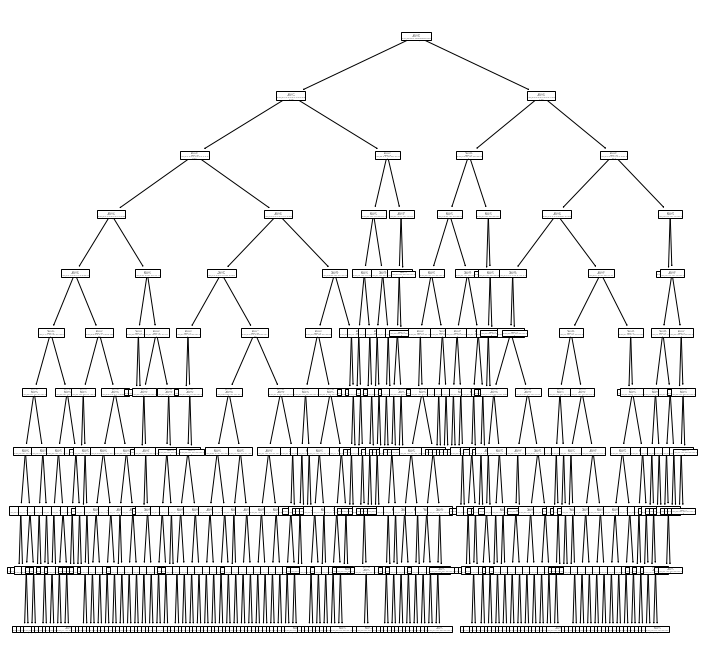

In [85]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf.fit(x_train,y_train));

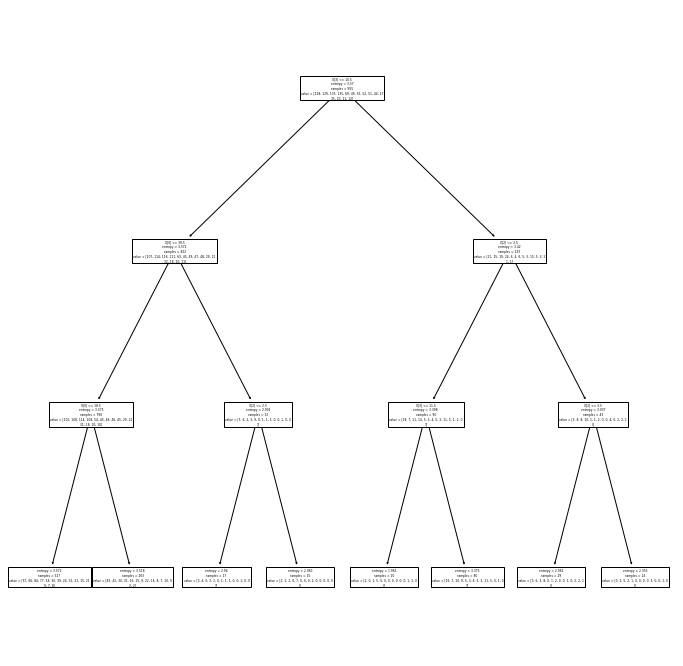

In [86]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf_en.fit(x_train,y_train));

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[30  2 42  6  2  0  0  0  0  0  0  0  0  0  0]
 [27  0 38  3  1  0  0  0  0  0  0  0  0  0  0]
 [28  1 44  1  0  0  0  0  0  0  0  0  0  0  0]
 [25  1 39  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  1 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  1 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0 17  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  1 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  2 13  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  9  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  2  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  4  0  0  0  0  0  0  0  0  0  0  0  0]]


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

          11       0.15      0.37      0.22        82
          12       0.00      0.00      0.00        69
          13       0.15      0.59      0.24        74
          14       0.08      0.02      0.03        66
          15       0.00      0.00      0.00        32
          16       0.00      0.00      0.00        29
          17       0.00      0.00      0.00        27
          18       0.00      0.00      0.00        37
          19       0.00      0.00      0.00        25
          20       0.00      0.00      0.00        11
          21       0.00      0.00      0.00        21
          22       0.00      0.00      0.00        21
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00        10
          25       0.00      0.00      0.00         6

    accuracy                           0.15       515
   macro avg       0.03      0.07      0.03       515
weighted avg       0.06   

/home/linux/[/home/linux/anaconda]/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
